정리를 하다가 말다가 해서 자세한건 책에 다 나와 았습니다.

## 6.5 푸아송 회귀

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
beer = pd.read_csv('../input/lm-model/6-5-1-poisson-regression.csv')
beer.head()

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0
3,4,14.1
4,2,9.4


In [3]:
mod_pois = smf.glm('beer_number~temperature', data=beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 18 Sep 2022   Deviance:                       5.1373
Time:                        01:54:56   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

### 6.5.5 모델 선택

In [4]:
# Null 모델 추정
mod_pois_null = smf.glm('beer_number~1', data=beer, family=sm.families.Poisson()).fit()

# AIC 비교
print('Null 모델        :', mod_pois_null.aic.round(3))
print('변수가 있는 모델  :', mod_pois.aic.round(3))

Null 모델        : 223.363
변수가 있는 모델  : 119.343


### 6.5.6 회귀곡선 그래프
seaborn 함수에 푸아송 회귀는 없다.

In [5]:
# 추정된 모델의 예측값을 산포도 위에 덧그림
# 예측값 작성
x_plot = np.arange(0, 37)
pred = mod_pois.predict(pd.DataFrame({'temperature':x_plot}))

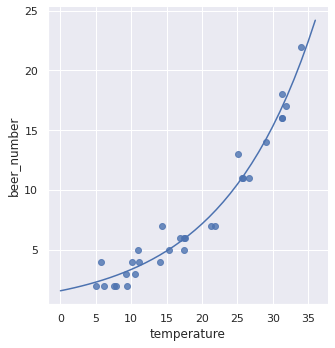

In [6]:
# 산점도 그리기
sns.lmplot(y='beer_number', x='temperature', data=beer,
           fit_reg=False)

# (회귀)곡선 그리기
plt.plot(x_plot, pred);

### 6.5.7 회귀계수 해석
링크함수가 항등함수가 아닌 경우 회귀계수의 해석이 바뀜

In [7]:
# 기온이 1도 오를때 판매 계수의 기댓값
exp_val_1 = pd.DataFrame({'temperature':[1]})
pred_1 = mod_pois.predict(exp_val_1)

In [8]:
# 기온이 2도 오를때 판매 계수의 기댓값
exp_val_2 = pd.DataFrame({'temperature':[2]})
pred_2 = mod_pois.predict(exp_val_2)

In [9]:
# 기온이 1도에서 1도가 오르면 판매 개수가 몇 배가 되는지
pred_2/pred_1

0    1.079045
dtype: float64

In [10]:
# 이전과 마찮가지로 summary 회귀계수에 지수를 취한 값과 같다.
np.exp(mod_pois.params[1])

1.079045054586893

여기까지 6장 끝...\
2회째 보는 책인데, 왜 봐도봐도 모르겠는가...\
아주 조금씩은 머릿속에 들어오는 느낌도 있기는 한데...\
이래가지고 언제... ㅠㅠ\

7장 머신러닝은 주욱 읽어 내려가고\
빅분기 필기부터 붙고\

데이터 과학을 위한 통계를 다시 봐야겠다.\
그러고 다시 이책을 보면 좀 더 들어오지 않을까....\
기대해본다.